# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#As we're doing a print log as they're being processed, we'll also include within the iteration to store values so 
#they can all be compiled.

#Also, we're adding processed_cities. This will retain the cities that have been properly been researched via API.
#this is a solution caused by using the original city list, which has a different length to the other lists...
#...since it contains cities that we were unable to receive data on.

processed_cities = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxtemp = []
windspeed = []

#Set up the URL components for the API call.
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&q="

#Creating a ticker value to show how many we've done in the processing log.
ticker = 0

#Iteration on the cities list going through each city. Variable controller value will be 'city'
for city in cities:
    
    #API call
    response = requests.get(query_url + city).json()
    
    #time module to add spacing to avoid hitting the 60 calls per minute cap.
    time.sleep(0.75)
    
    #we're using try/except. if it works, nothing else will happen other than what we need it to do. flipside...
    #if we dont get data, it will help us skip, show a message in the log, and continue the interation.
    try:
        
        #basically, if the value in the API under 'name' equals the city name that we used in the API call, true.
        #we include lower since our city list is all in lower case. The API call has the first letter capitalized.
        if response['name'].lower() == city:
            
            #Process log print line! We use the ticker value to show the current city's place in line.
            print(f"Currently processing #{ticker} | Receiving and extrapolating data for {city}")
            
            #increase ticker count by 1 to keep count how many were successfully processed.
            ticker += 1
            
            #everything below is to make sure we append to all the empty lists previously created.
            #other than processed_cities, they call out specific nuggets of info!
            processed_cities.append(city)
            cloudiness.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            maxtemp.append(response['main']['temp_max'])
            windspeed.append(response['wind']['speed'])
        

    except KeyError:
        print(f"Open Weather API cannot locate {city}. Currently skipping and looking up the next city.")
        pass

Currently processing #0 | Receiving and extrapolating data for namatanai
Currently processing #1 | Receiving and extrapolating data for ushuaia
Currently processing #2 | Receiving and extrapolating data for hamilton
Currently processing #3 | Receiving and extrapolating data for vanderhoof
Currently processing #4 | Receiving and extrapolating data for northam
Currently processing #5 | Receiving and extrapolating data for vaini
Currently processing #6 | Receiving and extrapolating data for albany
Currently processing #7 | Receiving and extrapolating data for geraldton
Currently processing #8 | Receiving and extrapolating data for deer lake
Currently processing #9 | Receiving and extrapolating data for avarua
Currently processing #10 | Receiving and extrapolating data for chicama
Currently processing #11 | Receiving and extrapolating data for qaanaaq
Open Weather API cannot locate tsihombe. Currently skipping and looking up the next city.
Currently processing #12 | Receiving and extrapola

Currently processing #98 | Receiving and extrapolating data for arraial do cabo
Currently processing #99 | Receiving and extrapolating data for channel-port aux basques
Currently processing #100 | Receiving and extrapolating data for avera
Currently processing #101 | Receiving and extrapolating data for ilulissat
Currently processing #102 | Receiving and extrapolating data for esperance
Currently processing #103 | Receiving and extrapolating data for yumen
Currently processing #104 | Receiving and extrapolating data for ashland
Currently processing #105 | Receiving and extrapolating data for taitung
Currently processing #106 | Receiving and extrapolating data for aykhal
Currently processing #107 | Receiving and extrapolating data for cidreira
Open Weather API cannot locate lolua. Currently skipping and looking up the next city.
Currently processing #108 | Receiving and extrapolating data for great falls
Currently processing #109 | Receiving and extrapolating data for vigrestad
Currentl

Currently processing #196 | Receiving and extrapolating data for escanaba
Currently processing #197 | Receiving and extrapolating data for hobyo
Open Weather API cannot locate asau. Currently skipping and looking up the next city.
Currently processing #198 | Receiving and extrapolating data for praia
Currently processing #199 | Receiving and extrapolating data for vigia
Currently processing #200 | Receiving and extrapolating data for dingle
Open Weather API cannot locate belushya guba. Currently skipping and looking up the next city.
Currently processing #201 | Receiving and extrapolating data for thompson
Currently processing #202 | Receiving and extrapolating data for mount gambier
Currently processing #203 | Receiving and extrapolating data for villamartin
Currently processing #204 | Receiving and extrapolating data for sitka
Open Weather API cannot locate jahrom. Currently skipping and looking up the next city.
Currently processing #205 | Receiving and extrapolating data for kenai


Currently processing #295 | Receiving and extrapolating data for bela palanka
Currently processing #296 | Receiving and extrapolating data for fort nelson
Currently processing #297 | Receiving and extrapolating data for rawson
Currently processing #298 | Receiving and extrapolating data for cumberland
Currently processing #299 | Receiving and extrapolating data for pasinler
Currently processing #300 | Receiving and extrapolating data for woodward
Currently processing #301 | Receiving and extrapolating data for pontes e lacerda
Currently processing #302 | Receiving and extrapolating data for mahendranagar
Currently processing #303 | Receiving and extrapolating data for nivala
Open Weather API cannot locate cheuskiny. Currently skipping and looking up the next city.
Currently processing #304 | Receiving and extrapolating data for cabedelo
Currently processing #305 | Receiving and extrapolating data for saint-joseph
Currently processing #306 | Receiving and extrapolating data for phonhong

Currently processing #392 | Receiving and extrapolating data for kirkenes
Currently processing #393 | Receiving and extrapolating data for hangu
Currently processing #394 | Receiving and extrapolating data for znamenskoye
Currently processing #395 | Receiving and extrapolating data for la palma
Currently processing #396 | Receiving and extrapolating data for wajima
Currently processing #397 | Receiving and extrapolating data for alghero
Currently processing #398 | Receiving and extrapolating data for hervey bay
Currently processing #399 | Receiving and extrapolating data for osypenko
Currently processing #400 | Receiving and extrapolating data for velasco ibarra
Currently processing #401 | Receiving and extrapolating data for rocha
Currently processing #402 | Receiving and extrapolating data for romitan
Currently processing #403 | Receiving and extrapolating data for ahipara
Currently processing #404 | Receiving and extrapolating data for nalut
Currently processing #405 | Receiving and

Currently processing #496 | Receiving and extrapolating data for saint-augustin
Currently processing #497 | Receiving and extrapolating data for dalvik
Open Weather API cannot locate marcona. Currently skipping and looking up the next city.
Currently processing #498 | Receiving and extrapolating data for buchanan
Currently processing #499 | Receiving and extrapolating data for pundaguitan
Currently processing #500 | Receiving and extrapolating data for altay
Currently processing #501 | Receiving and extrapolating data for hirado
Currently processing #502 | Receiving and extrapolating data for tulum
Currently processing #503 | Receiving and extrapolating data for sarakhs
Currently processing #504 | Receiving and extrapolating data for vorchdorf
Currently processing #505 | Receiving and extrapolating data for burns lake
Currently processing #506 | Receiving and extrapolating data for tommot
Currently processing #507 | Receiving and extrapolating data for norfolk
Currently processing #508

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Slapping the lists all together into a dictionary, converting into a pandas DataFrame, and then finally to a CSV.
dict_weather = {
    'City': processed_cities,
    'Cloudiness' : cloudiness,
    'Country' : country,
    'Date' : date,
    'Humidity' : humidity,
    'Latitude' : lat,
    'Longitude': lng,
    'Max Temp' : maxtemp,
    'Wind Speed' : windspeed
    }

df_weather = pd.DataFrame(dict_weather)

df_weather.to_csv(output_data_file)

In [9]:
#Later on in the exercise, each graph contains the date when this report was generated.
#this line of code creates time_final which helps provide the date when this analysis was executed no matter when its ran.

import datetime

dateconvert = df_weather.Date[len(df_weather.Date)-1]

time_value = datetime.datetime.utcfromtimestamp(dateconvert)
time_final = f'{time_value.month}/{time_value.day}/{time_value.year}'
time_final

'10/24/2019'

In [10]:
#output!
df_weather.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,namatanai,19,PG,1571890354,72,-3.66,152.44,302.16,7.55
1,ushuaia,40,AR,1571890141,43,-54.81,-68.31,286.15,8.20
2,hamilton,20,CA,1571890071,75,43.26,-79.87,284.82,3.60
3,vanderhoof,100,CA,1571890357,86,54.02,-124.02,275.74,2.67
4,northam,0,AU,1571890358,37,-31.65,116.67,293.15,3.60


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

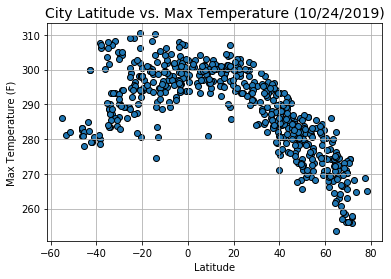

In [18]:
# Set figure size
plt.figure(figsize=(6,4))

#Plot latitude vs max temperature
plt.scatter(df_weather['Latitude'],df_weather['Max Temp'], marker = 'o',edgecolors='black')

# Add grid, x-axis labels and y-axis labels
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Add title including date of analysis (time_format)
plt.title(f'City Latitude vs. Max Temperature ({time_final})',size=14)

# Save the Figure to folder Images
plt.savefig("Images/scatter_citylat-maxtemp.png")

# Show the figure
plt.show()

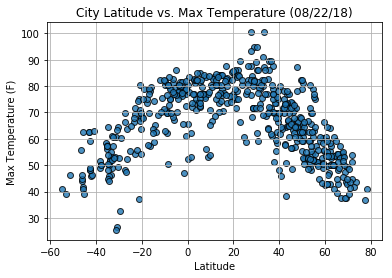

#### Latitude vs. Humidity Plot

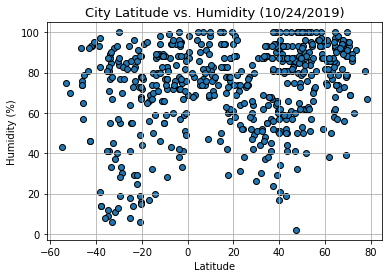

In [19]:
# Set figure size
plt.figure(figsize=(6,4))

#Plot latitude vs humidity
plt.scatter(df_weather['Latitude'],df_weather['Humidity'], marker = 'o',edgecolors='black')

# Add grid, x-axis labels and y-axis labels
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Add title including date of analysis (time_final)
plt.title(f'City Latitude vs. Humidity ({time_final})',size=13)

# Save the Figure to folder Images
plt.savefig("Images/scatter_citylat-humidity.png")

# Show the figure
plt.show()

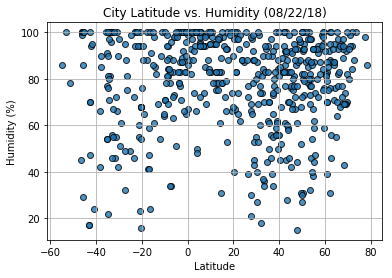

#### Latitude vs. Cloudiness Plot

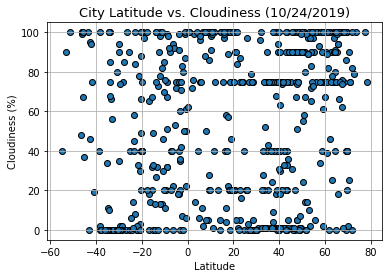

In [22]:
# Set figure size
plt.figure(figsize=(6,4))

#Plot latitude vs cloudiness (%)
plt.scatter(df_weather['Latitude'],df_weather['Cloudiness'], marker = 'o',edgecolors='black')

# Add grid, x-axis labels and y-axis labels
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Add title including date of analysis (time_format)
plt.title(f'City Latitude vs. Cloudiness ({time_final})',size=13)

# Save the Figure to folder Images
plt.savefig("Images/scatter_citylat-cloudiness.png")

# Show the figure
plt.show()

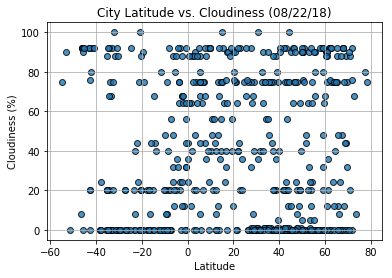

#### Latitude vs. Wind Speed Plot

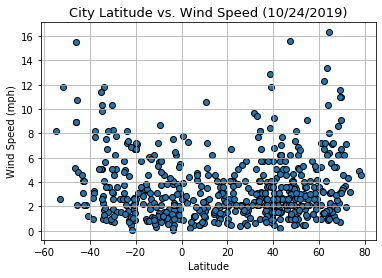

In [24]:
# Set figure size
plt.figure(figsize=(6,4))

#Plot latitude vs wind speed (mph)
plt.scatter(df_weather['Latitude'],df_weather['Wind Speed'], marker = 'o',edgecolors='black')

# Add grid, x-axis labels and y-axis labels
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Add title including date of analysis (time_format)
plt.title(f'City Latitude vs. Wind Speed ({time_final})',size=13)

# Save the Figure to folder Images
plt.savefig("Images/scatter_citylat-windspeed.png")

# Show the figure
plt.show()

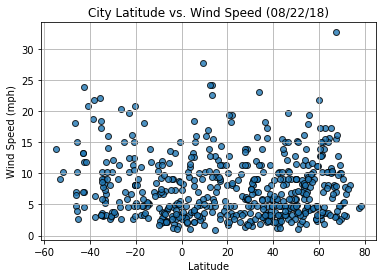